# Running DYNAMITE with BAYES-LOSVD output

## Data Preparation

Here are some helper functions to convert BAYES-LOSVD output to input files for DYNAMITE. I'll demonstrate on the example BAYES-LOSVD output file `NGC0000-SP_results.hdf5` in this directory. This file must correspond to the output file for *all* the bins combined (i.e. not the individual bin files).

First let's make an "empty" BayesLOSVD object,

In [1]:
import dynamite as dyn
BayesLOSVD = dyn.kinematics.BayesLOSVD(weight=1.)

And then convert the LOSVDs to the DYNAMITE file type,

In [2]:
filename = 'NGC0000-SP_results.hdf5'
BayesLOSVD.write_losvds_to_ecsv_format(filename, outfile='bayes_losvd_kins.ecsv')

This creates a file `bayes_losvd_kins.ecsv`. Next add the PSF into the header of this file,

In [3]:
BayesLOSVD.add_psf_to_datafile(sigma=[1.,2.],
                               weight=[0.6,0.4],
                               datafile='bayes_losvd_kins.ecsv')

We can also create the `aperture.dat` and `bins.dat` files from the BAYES-LOSVD output,

In [4]:
BayesLOSVD.write_aperture_and_bin_files(filename=filename,
                                        angle_deg=0.,
                                        aperture_filename='aperture.dat',
                                        bin_filename='bins.dat')

Finally - all data preparation steps complete - we can read create a new BayesLOSVD object with all of this data loaded in,

In [5]:
BayesLOSVD = dyn.kinematics.BayesLOSVD(datafile='bayes_losvd_kins.ecsv',
                                       aperturefile='aperture.dat',
                                       binfile='bins.dat',
                                       weight=1.)

In [6]:
print(BayesLOSVD.aperturefile)
print(BayesLOSVD.binfile)

aperture.dat
bins.dat


In [7]:
BayesLOSVD.data

binID,losvd [23],dlosvd [23]
int64,float64,float64
0,0.0009315995866962993 .. 0.007989723827563985,0.003172802321189809 .. 0.01102166055324799
1,0.0015634178237070796 .. 0.006151026473988539,0.003712997553619381 .. 0.009886574216475348
2,0.0014952076488095867 .. 0.005859423512956539,0.0038655642655624047 .. 0.008403823523786734
3,0.0013006332291746199 .. 0.009580512117064139,0.004177944482585003 .. 0.011805837261544425
4,0.0028644301986617835 .. 0.00998798369183298,0.006161749443131527 .. 0.014361196254301448
5,0.004917973775501375 .. 0.0022960386030333913,0.00998954554930891 .. 0.00630723695089467
6,0.0014222301304001907 .. 0.0032704850368621284,0.004284662236378622 .. 0.008359329127755902


Plot one example,

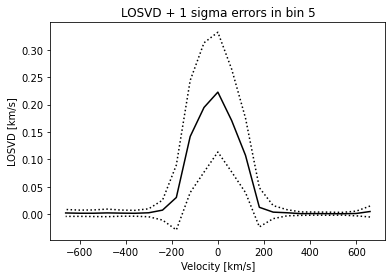

In [15]:
import matplotlib.pyplot as plt

bin_idx = 5
mu = BayesLOSVD.data['losvd'][bin_idx,:]
sig = BayesLOSVD.data['dlosvd'][bin_idx,:]
plt.plot(BayesLOSVD.data.meta['vcent'], mu, '-k')
plt.plot(BayesLOSVD.data.meta['vcent'], mu+sig, ':k')
plt.plot(BayesLOSVD.data.meta['vcent'], mu-sig, ':k')
plt.gca().set_xlabel('Velocity [km/s]')
plt.gca().set_ylabel('LOSVD [km/s]')
_ = plt.gca().set_title(f'LOSVD + 1 sigma errors in bin {bin_idx}')